In [1]:
import gRAMAkit as gR
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Volumen de interés
* Crearemos un espacio que replique el volumen donde se hará la simulación.
    * El universo será un paralelepípedo de 40 m x 40 m de área en el plano (x,y) y 14 m de altura en z.
    * El volumen está contenido en el siguiente conjunto:
        * $0<x<40~m$
        * $0<y<40~m$
        * $0>z>-14~m$
    * El espacio está dividido en voxels de dimensiones $(625.0, 625.0, 437.5)$ mm por lado. El número de cortes en cada dimensión es $(Nx,Ny,Nz)=( 64,64,32 )$
* En este espacio definiremos el volumen de la aeronave. Los ejemplos prefabricados son:
    * Cilindro con extremos esféricos (geometría salchicha)
    * Esfera

In [2]:
v=gR.Volumen(64,64,32,625,625,437.5,0,0,-14,unidad='mm',conversion2metros=0.001)

Volumen creado con celdas (Nx,Ny,Nz)=( 64 64 32 ), dimension de voxel (Lx,Ly,Lz)=( 625.0 625.0 437.5 ). Unidad de medida= mm . Factor de conversion a metros (m)= 0.001 . Todas distancias y coordenadas se suponen y operan en metros (m)


## Aeronave y phantom
* La función cigar indica los voxels que están ocupados por la aeronave.
    * Se definen las posiciones de los centros de cada esfera y el radio común a las esferas y el cilindro.
    * Si las dos esferas comparten el centro, el cilindro tiene longitud cero y la aeronave es esférica.
    * Por ejemplo, podemos embeber una aeronave de radio 7 m en el universo de profundidad 14 m $v$. Hay que colocar el centro de las esferas en la posición $z=-7m$.
    * En el caso de construir una simulación rápida (como en este ejemplo) en una aeronave esférica de radio 7 m, vamos a definir directamente la materia del phantom. Para ello reducimos el radio de la esfera de materia de forma tal que contenga un cubo en el centro de la nave con $1~m$ de arista. En este caso la posición del centro es $z=-7m$, pero el radio es $\sqrt{3}/2~m$.
* La función plotdensity genera una representación gráfica de la ubicación del volumen de materia interesante en el espacio. 

In [3]:
# Para usar cigar: son dos semiesferas unidas por un cilindro
# v.cigar(centro semiesfera 1,centro semiesfera 2,radio)
######
v.cigar(np.array([20,20,-7]),np.array([20,20,-7]),math.sqrt(3)/2)

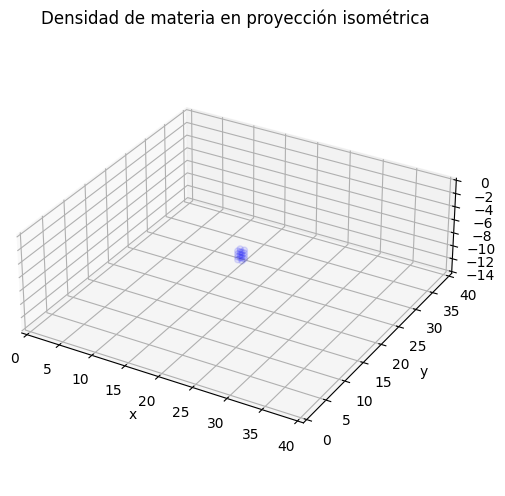

In [4]:
v.plotDensity()

## Plantilla de direcciones
* La función Rayos genera una plantilla de direcciónes distribuidas uniformemente sobre una sección esférica.
* Para definir las direcciones se escoge un sistema de referencia donde la dirección vertical se define con el ángulo polar $\theta=0$. El ángulo acimutal $\varphi$ indica las direcciones en el plano $xy$. 
* El parámetro $M$ define el número de paralelos en que se divide un hemisferio. Los paralelos se definen a latitud ($\theta$) constante.
* La opción por defecto define direcciones en el rango $\theta\in(0,\pi/3)$, pero se puede modificar con los parámetros thetaMin y thetaMax.
* Las direcciones $\varphi$ para cada paralelo $\theta_i$ se escogen de forma que se mantenga la densidad de direcciónes por ángulo sólido.
* El parámetro $zFin$ indica la profundidad máxima a la que se propagan los rayos. Se escoge en concordancia con el universo definido anteriormente. En este caso $zFin=-14$ es una elección razonable. Sin embargo, si el volumen de interés se restringe al phantom, se puede escoger una cota más alta. Por ejemplo, si la posición es $z=-7$~m y el radio es $\sqrt{3}/2~m$, $zFin=-8$ es una buena elección.

Creado un haz cónico de rayos centrado en (Xo,Yo,Zo)= [0 0 0] 26
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 21, 21, 22] 322
[6.283185307179586, 3.141592653589793, 2.0943951023931953, 1.5707963267948966, 1.2566370614359172, 1.0471975511965976, 0.8975979010256552, 0.7853981633974483, 0.6981317007977318, 0.6283185307179586, 0.5711986642890533, 0.5235987755982988, 0.5235987755982988, 0.483321946706122, 0.4487989505128276, 0.41887902047863906, 0.39269908169872414, 0.36959913571644626, 0.36959913571644626, 0.3490658503988659, 0.3306939635357677, 0.3306939635357677, 0.3141592653589793, 0.2991993003418851, 0.2991993003418851, 0.28559933214452665]
[0.009686971260041522, 0.00967950295626287, 0.009667063460353861, 0.009649664279019511, 0.009627321503901597, 0.00960005579385896, 0.009567892352221472, 0.009530860899044957, 0.009488995638400336, 0.009442335220736179, 0.009390922700359808, 0.00933480548808789, 0.01004687157405019, 0.009917027180545001, 0.00979

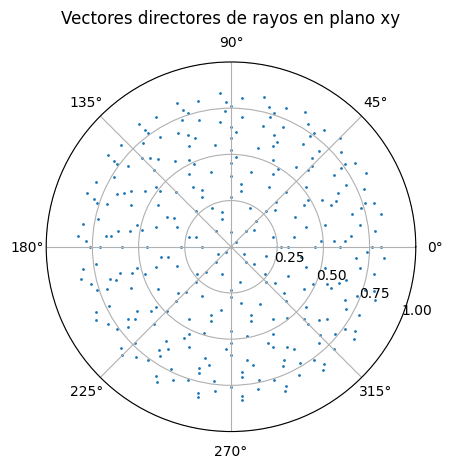

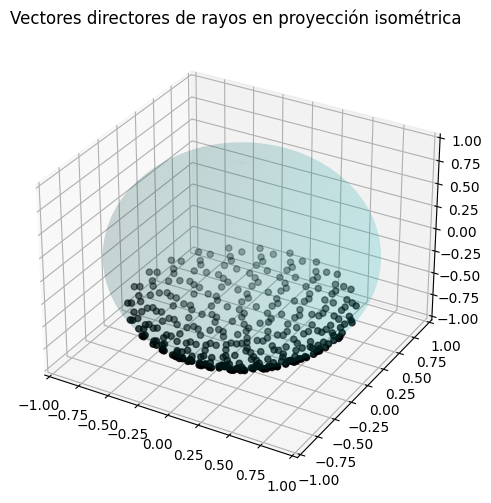

In [5]:
r=gR.Rayos(M=40,zFin=-8)

## Muestra
* La función muestra combina la materia en un volumen (v) con una plantilla de direcciones (r).
* A partir de mapaRayosEnEsfera() se consigue el conjunto de direcciones de rayos que intersectan el volumen con materia que atraviesan cada pixel del plano $xy$. Ese conjunto de direcciones se guardan en una lista anidada.
* sampleFromHistogram() toma un histograma total y genera una muestra correspondiente de partículas y direcciones distribuídas sobre todo el plano $xy$, tales que intersectan el volumen con materia.
    * Los histogramas están calibrados en particulas por $m^2$ por hora.
    * Se puede escoger un factor de sampleSize. Por ejemplo, si sampleSize=0.1, la muestra contiene el 10% de las partículas.

In [6]:
A=gR.muestra(v,r)

In [7]:
A.maparayosInfo

[['Density from function cigar on 2024-01-06 14:14:11',
  'ro = [20 20 -7]',
  'rf = [20 20 -7]',
  'r = 0.8660254037844386',
  'Se supone que todas las coordenadas y las distancias están en metros',
  ['Volumen físico datos (N,L,V):',
   [64, 64, 32],
   [0.625, 0.625, 0.4375],
   [0, 0, -14]]],
 ['Haz cónico de rayos (M,thetaMin,thetaMax):', 40, 0, 1.0471975511965976]]

In [8]:
A.mapaRayosEnEsfera()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
320 0.8406015979012554
320 0.7834762781009922
319 0.7891408741380268
319 0.6339441073211012
14
320 0.6174619917515956
320 0.41987890302342873
320 0.8533363412598152
279 0.8270904929146753
279 0.8270904929146695
319 0.5325872524221807
319 0.3181570021176579
319 0.8350447894543126
318 0.8086877847528056
318 0.6620672029594038
15
321 0.8336907019670987
321 0.6825878693785553
280 0.7650086036447075
280 0.7098763915009789
320 0.5669666870193685
320 0.06561368858325216
320 0.6663367948969208
279 0.5063515779893173
279 0.5063515779893082
319 0.4341003363715117
319 0.21083330660456864
319 0.823989981828776
299 0.7098763915009689
299 0.7650086036447132
318 0.43938799488663477
318 0.39276902620526616
16
321 0.7468504331052883
321 0.318569550375077
321 0.5498955709801283
280 0.5691516662863871
280 0.31400220140083834
320 0.7260762943312206
280 0.7810800651140407
320 0.3128189046765071
261 0.7381817785490004
320 0.6522040978255823
261 0.5492811534791568
279 0.314038

In [9]:
A.plano2linea() # prepara la lista de direcciones para generar la muestra.
A.sampleFromHistogram('histogramas/h_alta.csv',outFile='sample_alta.csv',sampleSize=.001)

## Calidad de la muestra
* Verificamos la calidad de la muestra:
    * Distribución espacial de las partículas. Punto de partida de partículas interesantes en el plano $xy$.
    * Total de partículas acumuladas con respecto a la distancia de separación al punto máximo ($r$).
    * Distribución de las direcciones en el plano $xy$ ($px,py$).
    * Distribución de las posiciones del punto de partida en un pixel.
    * Distribución de ángulos cenitales
    * Distribución de ángulos acimutales.

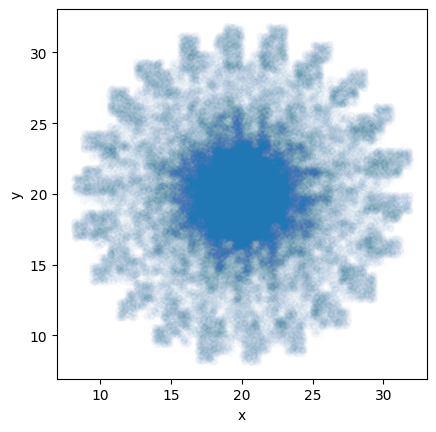

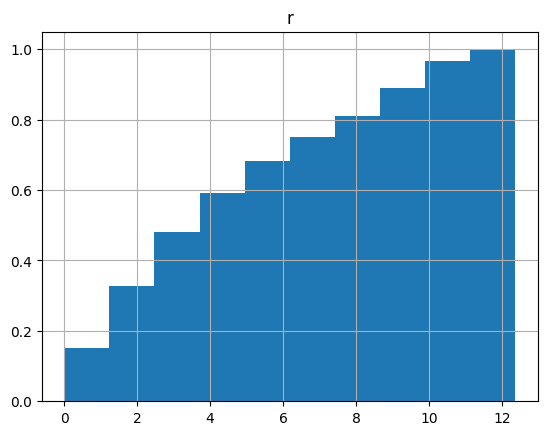

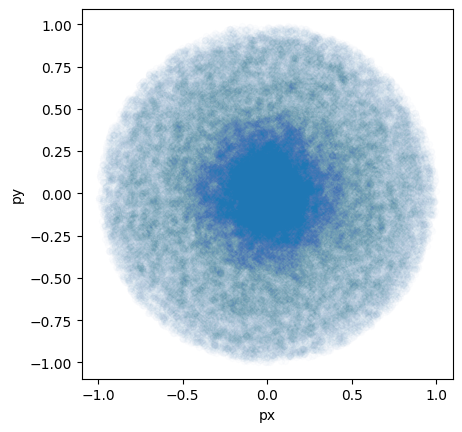

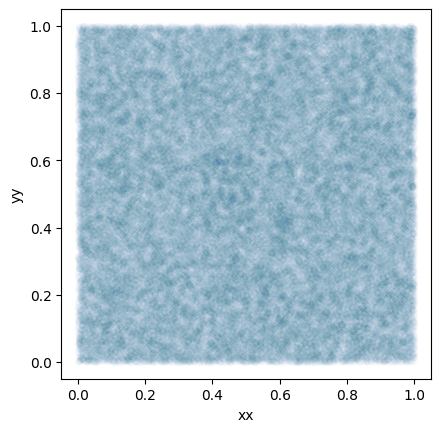

In [10]:
s=pd.read_csv('sample_alta.csv', sep=',', skiprows=11).sample(frac=0.1)
s.astype({'E':'float','px':'float','py':'float','pz':'float','x':'float','y':'float','z':'float'})
s.plot.scatter(x='x',y='y',alpha=0.01).set_aspect('equal')
s['r']=(np.sqrt((s['x']-20)**2+(s['y']-20)**2))
s.hist(column='r', density=True, cumulative = True)
#
s.plot.scatter(x='px',y='py',alpha=0.01).set_aspect('equal')
s['xx']=s['x'] % 1
s['yy']=s['y'] % 1
s.plot.scatter(x='xx',y='yy',alpha=0.01).set_aspect('equal')

<Axes: >

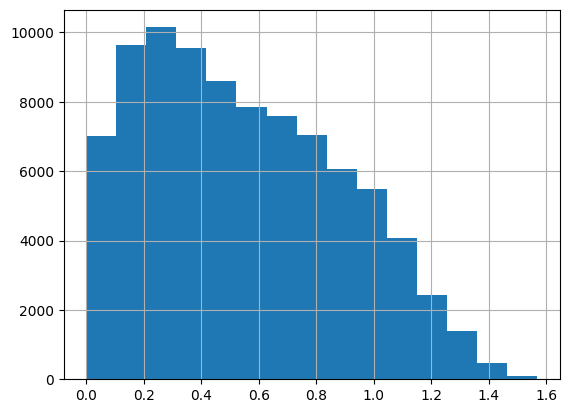

In [11]:
np.arccos(-s['pz']).hist(bins=15)

array([[<Axes: title={'center': 'pr'}>]], dtype=object)

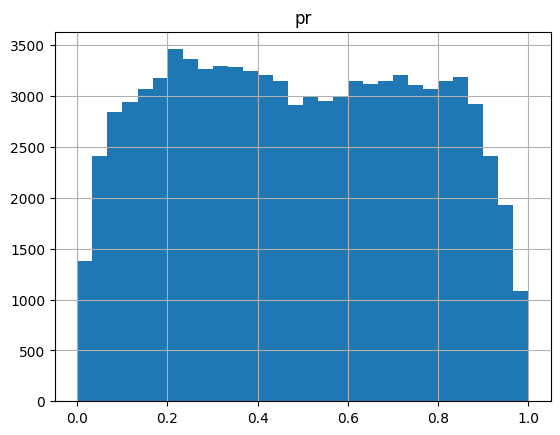

In [12]:
s['pr']=(np.sqrt((s['px'])**2+(s['py'])**2))
s.hist(column='pr',bins=30)

## Preparación de archivos para simulación
* ProcesosG4 lee el achivo de muestra y genera los archivos necesarios para la simulación en GEANT4.
    * Se cuenta con el parámetro frac, que permite modificar el tamaño de la muestra a conveniencia.
    * En la plantilla para GEANT4 la aeronave está centrada en el universo, por lo tanto el plano de inyección debe elevarse. El parámetro $r$ se encarga de dicha tarea.
    * El sistema de unidades en GEANT4 tiene la dirección axial en el eje $y$. La muestra se rota.
    * La variable d_salida contiene la lista de partículas.
    * La variable d_salida_vert tiene la lista de partículas agrupadas por rangos de energía y alineadas verticalmente. Este arreglo se utiliza para hacer la estimación rápida de la energía depositada en el phantom. Monitoreando el número de partículas totales se puede anticipar el tiempo de simulación. Conviene comenzar con una cantidad pequeña de partículas para estimar la cantidad óptima.
    * macGun_vert() usa la información en d_salida_vert para generar el archivo para GEANT4.

In [13]:
muestra=gR.ProcesosG4('sample_alta.csv',r=7,frac=0.01)

['e+', 'e-', 'gamma', 'neutron', 'proton']
e+
e-
gamma
neutron
proton


In [14]:
muestra.d_salida

,E,Particula,Angulo,N_part,x,y,z,px,py,pz
0,5.889533,e+,0.026698,5.0,0.0,6.975393,0.586421,-0.0,-0.996485,-0.083774
1,10.234963,e+,0.026698,5.0,0.0,6.975393,0.586421,-0.0,-0.996485,-0.083774
2,17.786549,e+,0.026698,2.0,0.0,6.975393,0.586421,-0.0,-0.996485,-0.083774
3,30.909864,e+,0.026698,4.0,0.0,6.975393,0.586421,-0.0,-0.996485,-0.083774
4,53.715857,e+,0.026698,5.0,0.0,6.975393,0.586421,-0.0,-0.996485,-0.083774
...,...,...,...,...,...,...,...,...,...,...
495,1330.429196,proton,0.449960,0.0,0.0,1.095905,6.913682,-0.0,-0.156558,-0.987669
496,1656.266162,proton,0.449960,0.0,0.0,1.095905,6.913682,-0.0,-0.156558,-0.987669
497,2061.904239,proton,0.449960,1.0,0.0,1.095905,6.913682,-0.0,-0.156558,-0.987669
498,2566.887611,proton,0.449960,0.0,0.0,1.095905,6.913682,-0.0,-0.156558,-0.987669


In [15]:
muestra.d_salida_vert

,E,Particula,N_part,x,y,z,px,py,pz
0,1.505122,e+,5.0,0.0,7.0,0.0,0.0,-1.0,0.0
1,3.409223,e+,19.0,0.0,7.0,0.0,0.0,-1.0,0.0
2,7.722167,e+,40.0,0.0,7.0,0.0,0.0,-1.0,0.0
3,17.491335,e+,56.0,0.0,7.0,0.0,0.0,-1.0,0.0
4,39.619294,e+,59.0,0.0,7.0,0.0,0.0,-1.0,0.0
5,89.740918,e+,36.0,0.0,7.0,0.0,0.0,-1.0,0.0
6,203.270466,e+,33.0,0.0,7.0,0.0,0.0,-1.0,0.0
7,460.424111,e+,6.0,0.0,7.0,0.0,0.0,-1.0,0.0
8,1042.898000,e+,5.0,0.0,7.0,0.0,0.0,-1.0,0.0
9,2362.248658,e+,2.0,0.0,7.0,0.0,0.0,-1.0,0.0


In [16]:
muestra.d_salida_vert['N_part'].sum() # menos de 10000 partículas funciona bien en un i5

8748.0

In [17]:
muestra.macGun_vert('instruccionesG4.mac')

## GEANT4
* El script estimacion.sh dispara las simulaciones en GEANT4. Es necesario revisar la ruta de la instalación de GEANT4 en la máquina y ajustarla en el script. Ver la variable rutaG4.
* $ bash estimacion.sh
* La salida es el archivo Ejemplo/ED_totales/totalED.csv con la energía depositada en cada voxel. Se puede hacer el análisis inmediatamente, pero es recomendable hacer una copia del archivo en otra ubicación, ya que al correr estimacion.sh se limpia el contenido de la carpeta Ejemplo/ED_totales/

## Visualización y dosis equivalente
* visuales() lee la salida de energía depositada y permite graficar los cortes de energía depositada en el phantom.
    * CortesEnZ() muestra los cortes paralelos al haz.
    * CortesEnY() muestra los cortes perpendiculares al haz.
    * Las energías depositadas se miden en MeV.
    * Las coordenadas $x,y,z$ se miden en cm.
* dosisMediaEqEsfera() calcula la dosis media equivalente en $\mu$Sv. En esta función:
    * radio es el radio de la esfera que contiene el phantom en decímetros. $r=\sqrt{3}/2~m$ es la elección de este ejemplo.
    * sample es el factor de corrección de muestreo. En este ejemplo es 1e-5=0.001*0.01, que son los submuestreos definidos en las funciones sampleFromHistogram() y ProcesosG4() respectivamente.
    * Neutron es una variable lógica. Su valor por defecto es False. Si cambia a True, se calcula la dosis equivalente de neutrones.

In [20]:
q=gR.visuales('ED_totales/totalED.csv')

/home/jose/Documents/Proyectos/2023/dosisVuelos/EFR/Ejemplo/gRAMAkit.py:1465: UserWarning: Log scale: values of z <= 0 have been masked
  im = axs[i, j].contourf(self.capasP[(i*col+j)*muestreo],norm=norm)


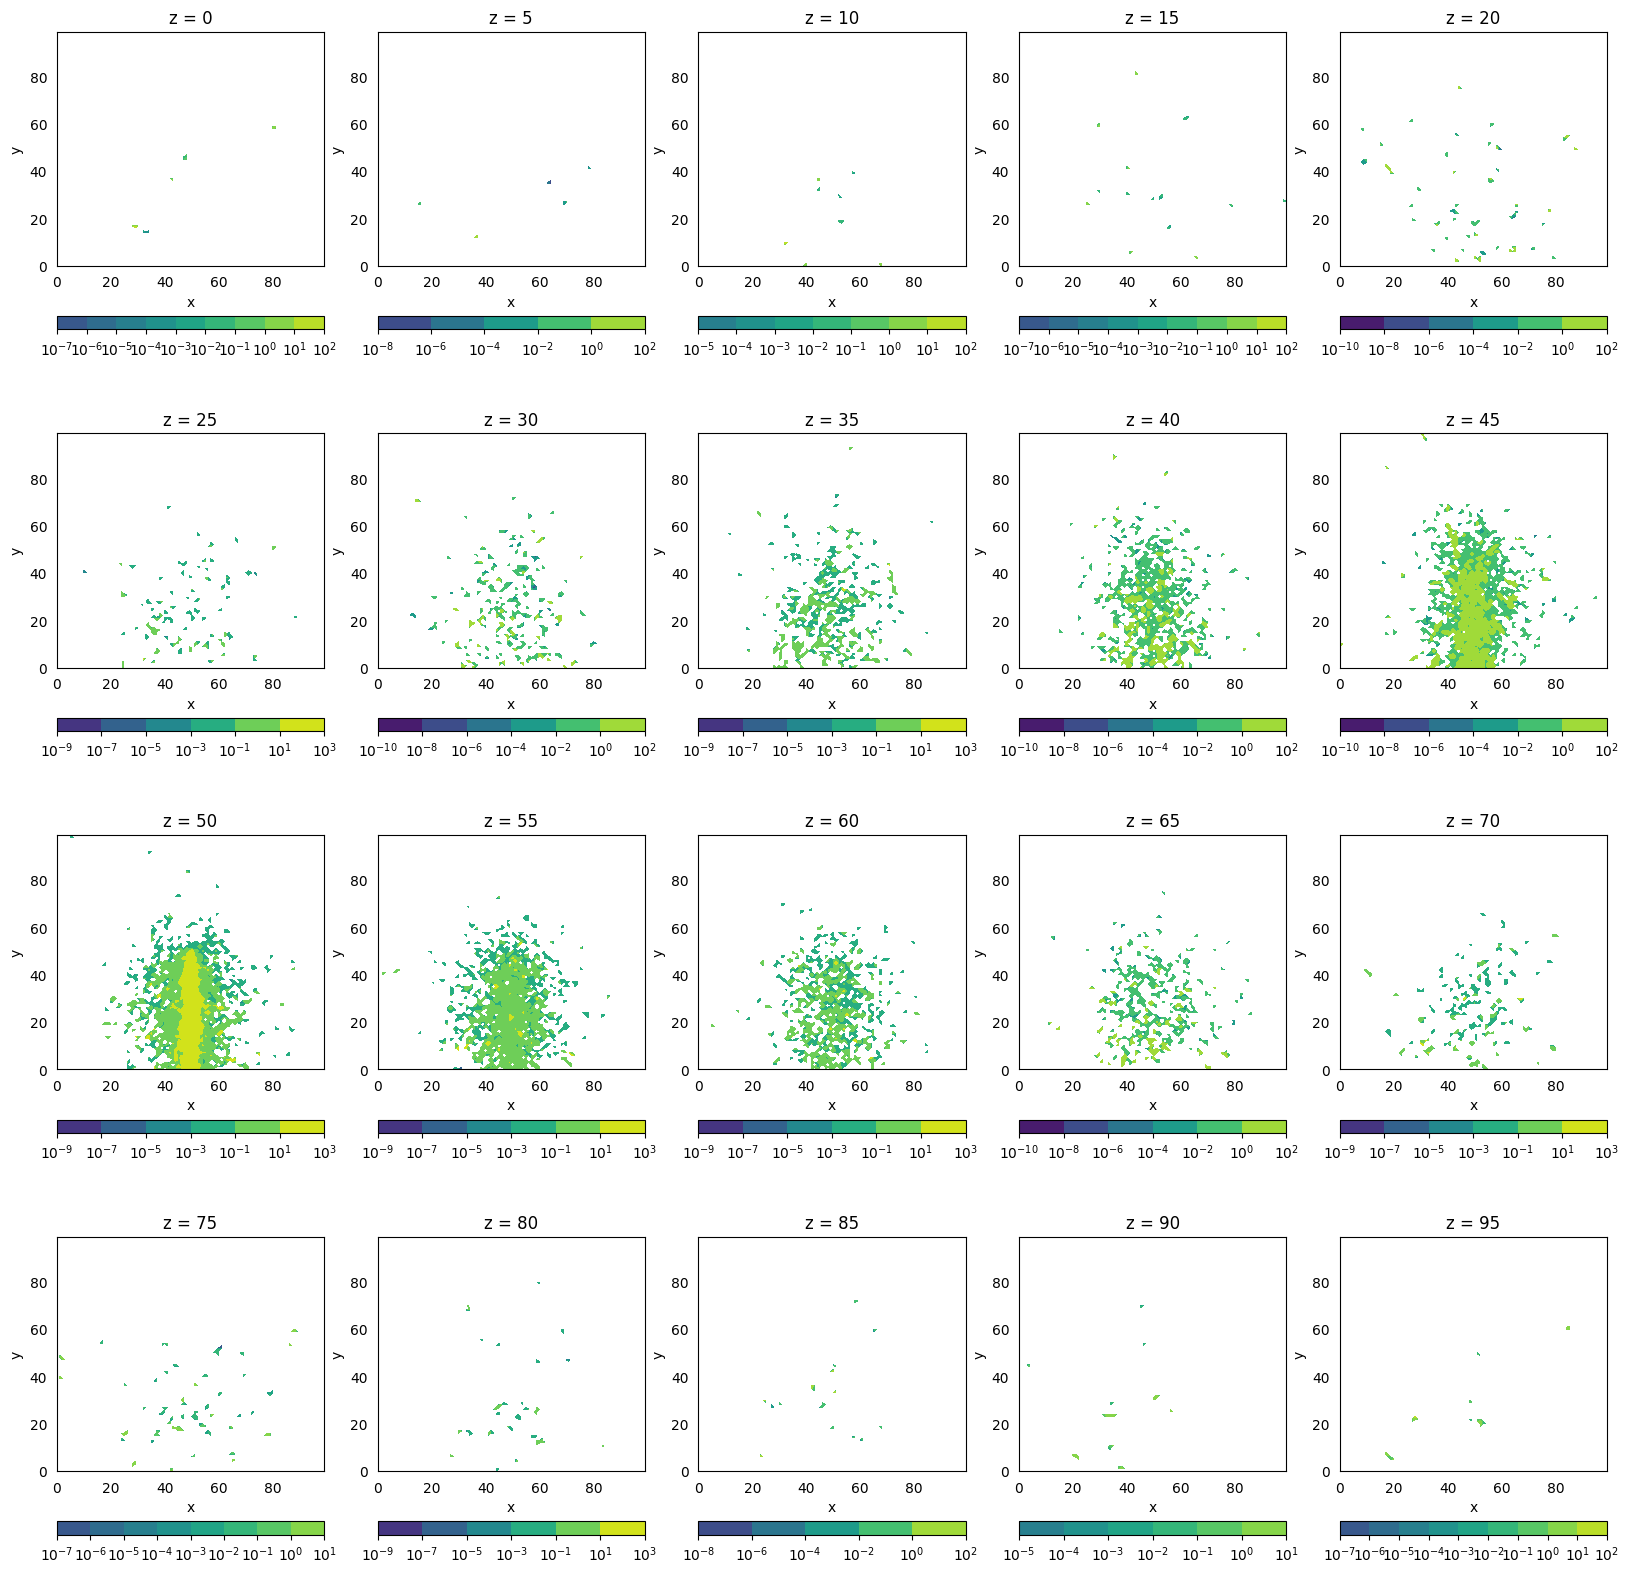

In [21]:
q.CortesEnZ()

/home/jose/Documents/Proyectos/2023/dosisVuelos/EFR/Ejemplo/gRAMAkit.py:1500: UserWarning: Log scale: values of z <= 0 have been masked
  im = axs[i, j].contourf(self.capasL[(i*col+j)*muestreo],norm=norm)


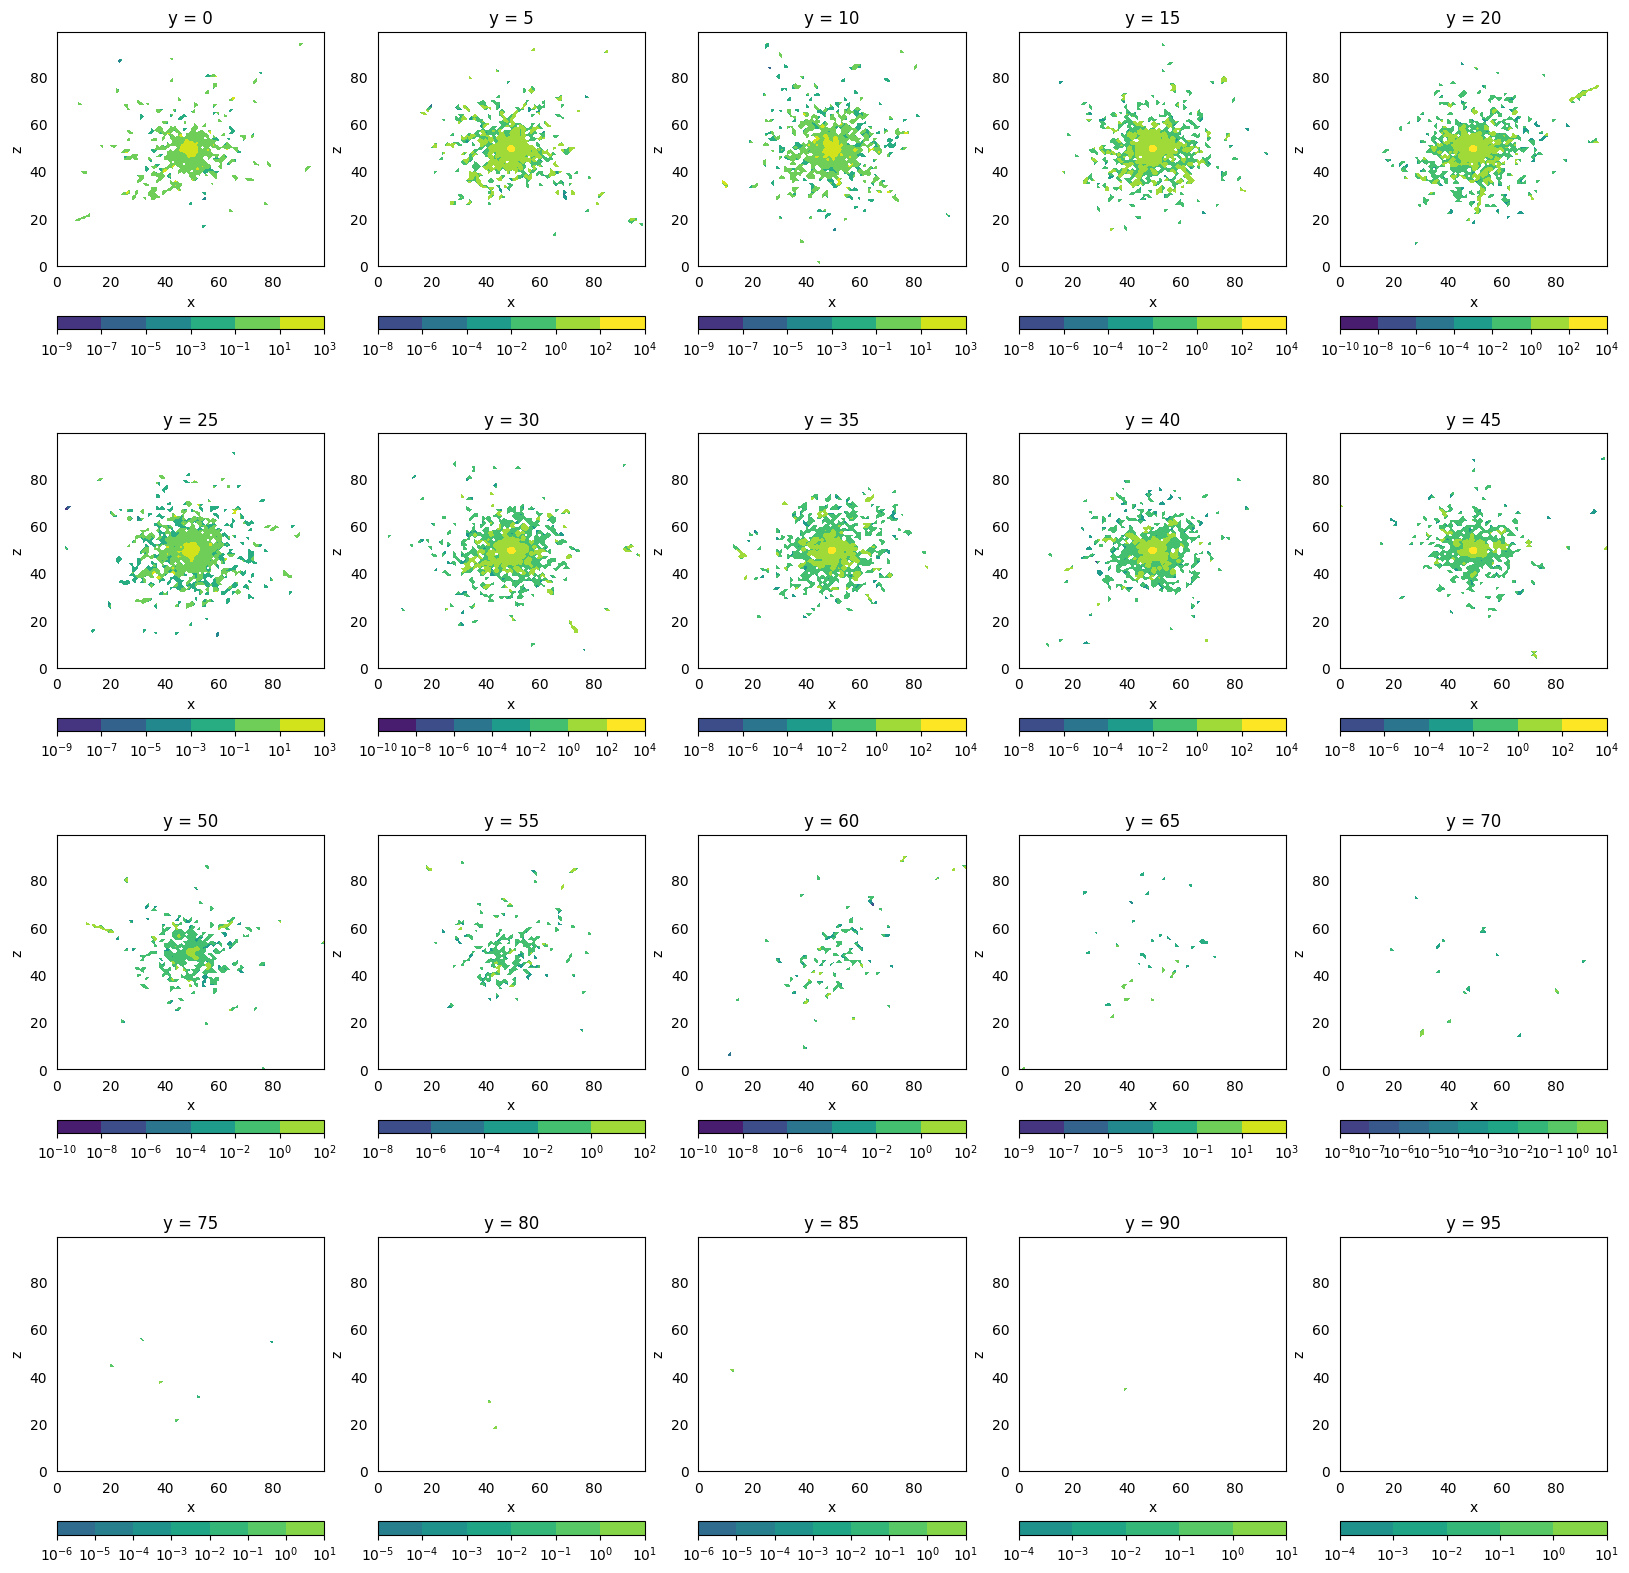

In [22]:
q.CortesEnY()

In [26]:
gR.dosisMediaEqEsfera('totalED_baja.csv',radio=8.66,sample=1e-5,Neutron=False)

22715.339288989955
386.92209994410047 2.430516154266997
579.216738803704 2.12653878264572
867.0790077870116 1.8995838820923021
1298.0046248278431 1.7413814690199172
1943.0939867573516 1.6381134110422275
2908.7833503469546 1.5748520566889224
4354.406239183242 1.5384244434244003
6518.482613556048 1.5186830335773513
9758.073374247815 1.508604450971946
14607.693480562697 1.5037534868224118
20142.908912244213
88662.43587569981


0.7744872730174885

In [27]:
gR.dosisMediaEqEsfera('totalED_alta.csv',radio=8.66,sample=1e-5,Neutron=False)

64421.293015020325
344.87802047365346 2.531296576826618
516.350715907924 2.205121446091748
773.0793091785134 1.956629152617508
1157.4528704371974 1.7800803941460455
1732.9362348436027 1.662712585617172
2594.54883281735 1.5895321362824792
3884.5535747490526 1.5466612223073941
5815.946219331729 1.5230331130074548
8707.62361112351 1.5107688301938476
13037.037498896918 1.5047687415170876
95155.4751919594
184514.82594858922


2.026255887400183